In [15]:
import numpy as np
from scipy.integrate import quad
from math import pi as PI
import matplotlib.pyplot as plt

# Define Constants

In [5]:
c = 299792.458 # speed of light km/s
a0 = 1. # scale factor at present time
H0 = 70 # Hubble's constant km/s/Mpc

WM = 0.3 # matter density parameter
WV = 0.7 # vacuum density parameter
WR = 0. # radiation density parameter
WK = 0. # curvature density parameter

h = H0/100
WR = 4.165e-5/h**2
WK = 1-WM-WR-WV

In [7]:
# Conversion factors
arcsec = 2*PI/360/60/60
Tyr = 977.8 # coefficent for converting 1/H into Gyr

In [9]:
z_arr = np.linspace(0,13,1000)

In [25]:
quad(lambda a : 1/adot(a),0,a(1))

(0.4114397345657252, 8.389964687669958e-10)

In [21]:
a = lambda z : 1/(1+z)
adot = lambda a : (WM/a + WR/a**2 + WV*a**2 + WK)**.5
age = np.array([quad(lambda a : 1/adot(a),0,a(z))[0] for z in z_arr])
distance = np.array([quad(lambda a : 1/adot(a)*1/a,a(z),1)[0] for z in z_arr])

In [27]:
ratio = 1. # Something to do with the curvature of the universe.

DA = []

for z, d in zip(z_arr, distance):
    x = abs(WK)**.5*d
    if x > 0.1:
        if WK > 0:
          ratio =  0.5*(exp(x)-exp(-x))/x 
        else:
          ratio = sin(x)/x
    else:
        y = x*x
        if WK < 0:
            y = -y
        ratio = 1. + y/6. + y*y/120.
    DCMT = ratio*d
    DA.append(a(z)*DCMT)
DA = np.array(DA)

In [32]:
age_Gyr = age * (Tyr/H0)
distance_Mpc = distance * (c/H0)
DA_Mpc = DA * (c/H0)
res = DA * 1000*arcsec * (c/H0)

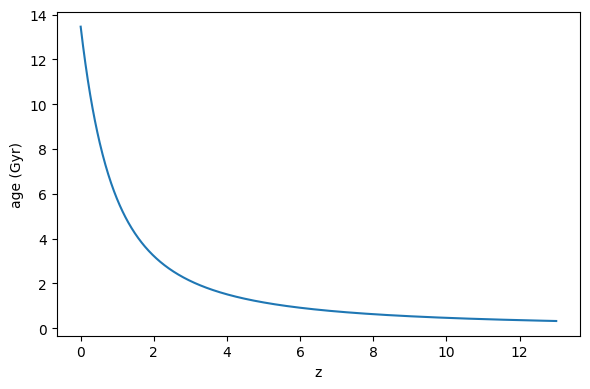

In [30]:
fig, ax = plt.subplots(1,1,figsize=(6,4),tight_layout=True)

ax.set_xlabel("z")
ax.set_ylabel("age (Gyr)")

ax.plot(z_arr,age_Gyr)

plt.show()

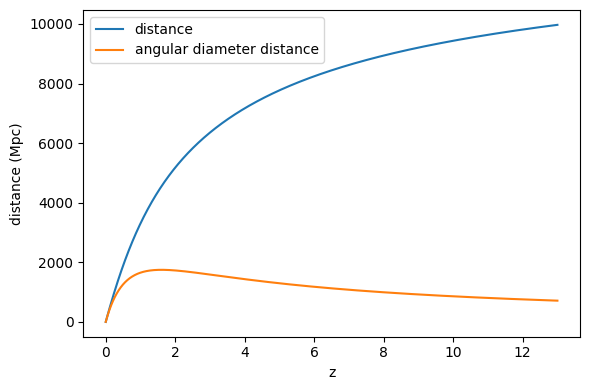

In [34]:
fig, ax = plt.subplots(1,1,figsize=(6,4),tight_layout=True)

ax.set_xlabel("z")
ax.set_ylabel("distance (Mpc)")

ax.plot(z_arr,distance_Mpc,label="distance")
ax.plot(z_arr,DA_Mpc,label="angular diameter distance")

ax.legend()

plt.show()

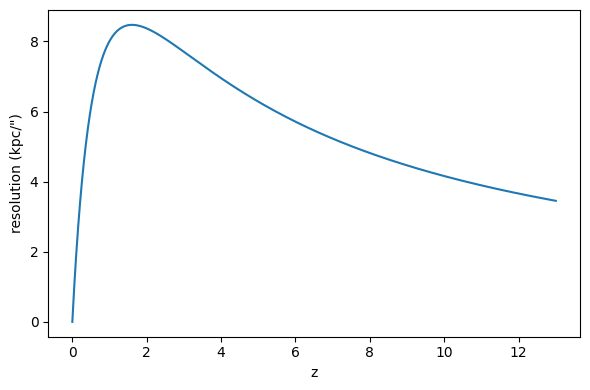

In [35]:
fig, ax = plt.subplots(1,1,figsize=(6,4),tight_layout=True)

ax.set_xlabel("z")
ax.set_ylabel('resolution (kpc/")')

ax.plot(z_arr,res)

plt.show()